In [14]:
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
X, color = make_swiss_roll(n_samples=1000, noise=0.05)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
plt.show()

In [7]:
pd.set_option('display.max_columns', None)
df = pd.read_csv(r".\ch5_equipo_03.csv")
display(df)

,Unnamed: 0,Compound_CID,Name,Synonyms,Molecular_Weight,Molecular_Formula,Polar_Area,Complexity,XLogP,Heavy_Atom_Count,H-Bond_Donor_Count,H-Bond_Acceptor_Count,Rotatable_Bond_Count,InChI,SMILES,InChIKey,IUPAC_Name,Exact_Mass,Monoisotopic_Mass,Charge,Covalent_Unit_Count,Isotopic_Atom_Count,Total_Atom_Stereo_Count,Defined_Atom_Stereo_Count,Undefined_Atom_Stereo_Count,Total_Bond_Stereo_Count,Defined_Bond_Stereo_Count,Undefined_Bond_Stereo_Count,Linked_PubChem_Literature_Count,Linked_PubChem_Patent_Count,Linked_PubChem_Patent_Family_Count,MeSH_Headings,Annotation_Content,Annotation_Type_Count,Linked_BioAssays,Create_Date,Data_Source,Data_Source_Category,Tagged_by_PubChem
0,0,15667210,2'-Deoxy-5'-O-[(S)-Hydroxy{[(S)-Hydroxy(Phosph...,"alpha,beta-methylene-dATP|CHEMBL1162297|138998...",489.21,C11H18N5O11P3,250.0,769.0,-4.5,30,6,15,8,InChI=1S/C11H18N5O11P3/c12-10-9-11(14-3-13-10)...,C1[C@@H]([C@H](O[C@H]1N2C=NC3=C(N=CN=C32)N)COP...,XETARULVTCYJAN-XLPZGREQSA-N,"[(2R,3S,5R)-5-(6-aminopurin-9-yl)-3-hydroxyoxo...",489.021567,489.021567,0,1,0,3,3,0,0,0,0,9,0,0,NaN,Biological Test Results|Interactions and Pathw...,5,391154,20070212,BindingDB|BLD Pharm|BOC Sciences|ChEMBL|ChemSp...,Chemical Vendors|Curation Efforts|Governmental...,NaN
1,1,650691,Isopropyl 5-({[(butylamino)carbonyl]amino}sulf...,isopropyl 5-({[(butylamino)carbonyl]amino}sulf...,332.37,C13H20N2O6S,123.0,485.0,2.1,22,2,6,8,InChI=1S/C13H20N2O6S/c1-4-5-8-14-13(17)15-22(1...,CCCCNC(=O)NS(=O)(=O)C1=CC=C(O1)C(=O)OC(C)C,CBXVSNAYNRZZDC-UHFFFAOYSA-N,propan-2-yl 5-(butylcarbamoylsulfamoyl)furan-2...,332.104208,332.104208,0,1,0,0,0,0,0,0,0,4,0,0,NaN,Biological Test Results|Classification|Literat...,6,360|361|368|373|374|411|422|425|429|430|431|43...,20050604,ABI Chem|AKos Consulting & Solutions|ASINEX|Au...,Chemical Vendors|Curation Efforts|Governmental...,NaN
2,2,4763,Phenobarbital,phenobarbital|Phenobarbitone|Phenobarbitol|50-...,232.23,C12H12N2O3,75.3,339.0,1.5,17,2,3,2,InChI=1S/C12H12N2O3/c1-2-12(8-6-4-3-5-7-8)9(15...,CCC1(C(=O)NC(=O)NC1=O)C2=CC=CC=C2,DDBREPKUVSBGFI-UHFFFAOYSA-N,"5-ethyl-5-phenyl-1,3-diazinane-2,4,6-trione",232.084792,232.084792,0,1,0,0,0,0,0,0,0,42414,157971,44619,Phenobarbital,Biological Test Results|Interactions and Pathw...,16,248|423|424|880|881|894|1030|1188|1189|1191|11...,20050325,001Chemical|AAA Chemistry|ABI Chem|AHH Chemica...,Chemical Vendors|Curation Efforts|Governmental...,C78272 - Agent Affecting Nervous System > C264...
3,3,13814,Norbormide,NORBORMIDE|Raticate|Shoxin|Mcneil 1025|991-42-...,511.60,C33H25N3O3,92.2,1040.0,3.1,39,2,5,5,"InChI=1S/C33H25N3O3/c37-31-28-22-19-23(33(39,2...",C1=CC=C(C=C1)C(=C2C3C=C(C2C4C3C(=O)NC4=O)C(C5=...,DNTHHIVFNQZZRD-UHFFFAOYSA-N,8-(hydroxy-phenyl-pyridin-2-ylmethyl)-10-[phen...,511.189592,511.189592,0,1,0,5,0,5,1,0,1,73,235,28,NaN,Biological Test Results|Chemical and Physical ...,14,287790|287791|287792|287796|287799,20050326,3WAY PHARM INC|AbaChemScene|ABI Chem|BenchChem...,Chemical Vendors|Curation Efforts|Governmental...,D010575 - Pesticides > D012378 - Rodenticides|...
4,4,25146,Dialifor,Dialifos|DIALIFOR|10311-84-9|Caswell No. 280A|...,393.80,C14H17ClNO4PS2,113.0,473.0,3.8,23,0,6,8,"InChI=1S/C14H17ClNO4PS2/c1-3-19-21(22,20-4-2)2...",CCOP(=S)(OCC)SC(CCl)N1C(=O)C2=CC=CC=C2C1=O,MUMQYXACQUZOFP-UHFFFAOYSA-N,2-(2-chloro-1-diethoxyphosphinothioylsulfanyle...,393.002515,393.002515,0,1,0,1,0,1,0,0,0,212,9694,2133,NaN,Agrochemical Information|Biological Test Resul...,16,1469|1479|588513|588514|588515|588516|588526|5...,20050327,10X CHEM|A2B Chem|AA BLOCKS|ABI Chem|Achemtek|...,Chemical Vendors|Curation Efforts|Governmental...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,2583,Carteolol,CARTEOLOL|51781-06-7|Carteololum|Carteololum [...,292.37,C16H24N2O3,70.6,354.0,1.0,21,3,4,6,"InChI=1S/C16H24N2O3/c1-16(2,3)17-9-11(19)10-21...",CC(C)(C)NCC(COC1=CC=CC2=C1CCC(=O)N2)O,LWAFSWPYPHEXKX-UHFFFAOYSA-N,"5-[3-(

In [8]:
df_new = df.select_dtypes(include=["number"])
display(df_new)

,Unnamed: 0,Compound_CID,Molecular_Weight,Polar_Area,Complexity,XLogP,Heavy_Atom_Count,H-Bond_Donor_Count,H-Bond_Acceptor_Count,Rotatable_Bond_Count,Exact_Mass,Monoisotopic_Mass,Charge,Covalent_Unit_Count,Isotopic_Atom_Count,Total_Atom_Stereo_Count,Defined_Atom_Stereo_Count,Undefined_Atom_Stereo_Count,Total_Bond_Stereo_Count,Defined_Bond_Stereo_Count,Undefined_Bond_Stereo_Count,Linked_PubChem_Literature_Count,Linked_PubChem_Patent_Count,Linked_PubChem_Patent_Family_Count,Annotation_Type_Count,Create_Date
0,0,15667210,489.21,250.0,769.0,-4.5,30,6,15,8,489.021567,489.021567,0,1,0,3,3,0,0,0,0,9,0,0,5,20070212
1,1,650691,332.37,123.0,485.0,2.1,22,2,6,8,332.104208,332.104208,0,1,0,0,0,0,0,0,0,4,0,0,6,20050604
2,2,4763,232.23,75.3,339.0,1.5,17,2,3,2,232.084792,232.084792,0,1,0,0,0,0,0,0,0,42414,157971,44619,16,20050325
3,3,13814,511.60,92.2,1040.0,3.1,39,2,5,5,511.189592,511.189592,0,1,0,5,0,5,1,0,1,73,235,28,14,20050326
4,4,25146,393.80,113.0,473.0,3.8,23,0,6,8,393.002515,393.002515,0,1,0,1,0,1,0,0,0,212,9694,2133,16,20050327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,2583,292.37,70.6,354.0,1.0,21,3,4,6,292.178693,292.178693,0,1,0,1,0,1,0,0,0,946,26113,4785,14,20050325
2996,2996,135398513,225.20,115.0,308.0,-1.9,16,3,5,4,225.086189,225.086189,0,1,0,0,0,0,0,0,0,16840,110991,25036,18,20190110
2997,2997,16051933,1069.20,489.0,2040.0,-4.0,74,13,15,19,1068.426956,1068.426956,0,1,0,7,7,0,0,0,0,4487,28587,5063,13,20070507
2998,2998,11634458,484.90,91.0,832.0,2.9,34,2,5,5,484.131361,484.131361,0,1,0,2,2,0,0,0,0,20,694,147,12,20061026


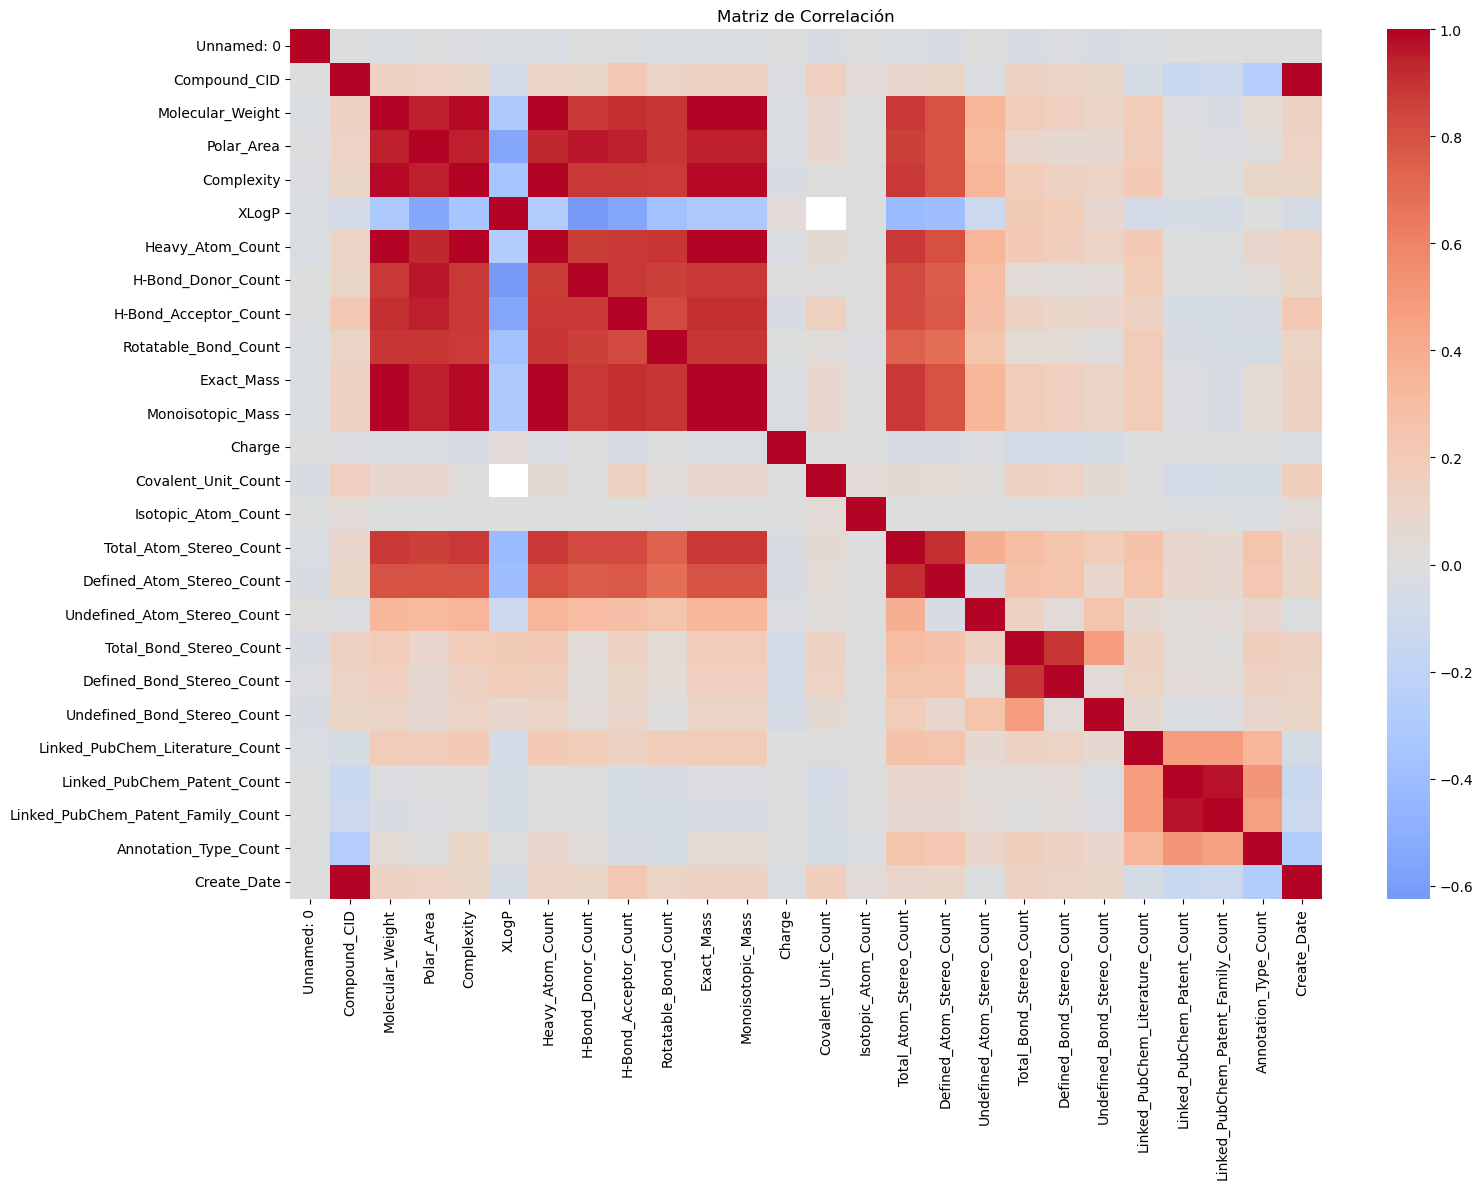

In [10]:
correlation_matrix = df_new.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False)
plt.title("Matriz de Correlación")
plt.tight_layout()
plt.show()

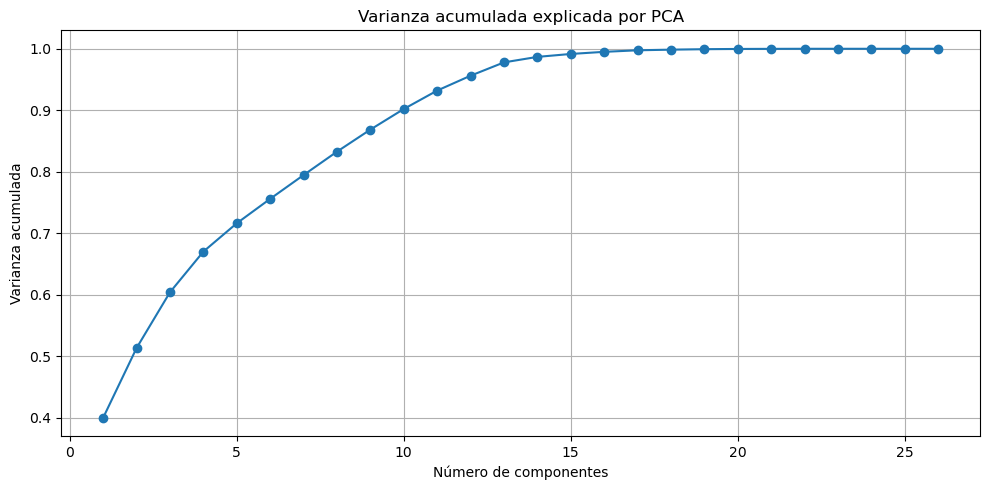

In [15]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(df_new)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

pca = PCA()
pca.fit(X_scaled)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o')
plt.title('Varianza acumulada explicada por PCA')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
components = pca.components_
feature_names = df_new.columns

pc_df = pd.DataFrame({
    'Feature': feature_names,
    'PC1': components[0],
    'PC2': components[1]
})

pc_df['PC1_abs'] = pc_df['PC1'].abs()
pc_df['PC2_abs'] = pc_df['PC2'].abs()

print("Top 10 variables más influyentes en PC1:")
print(pc_df.sort_values(by='PC1_abs', ascending=False)[['Feature', 'PC1']].head(10))

print("\nTop 10 variables más influyentes en PC2:")
print(pc_df.sort_values(by='PC2_abs', ascending=False)[['Feature', 'PC2']].head(10))

Top 10 variables más influyentes en PC1:
                    Feature       PC1
11        Monoisotopic_Mass  0.304433
10               Exact_Mass  0.304433
2          Molecular_Weight  0.304409
6          Heavy_Atom_Count  0.302860
4                Complexity  0.302272
3                Polar_Area  0.301202
8     H-Bond_Acceptor_Count  0.291295
7        H-Bond_Donor_Count  0.287974
15  Total_Atom_Stereo_Count  0.287492
9      Rotatable_Bond_Count  0.277964

Top 10 variables más influyentes en PC2:
                               Feature       PC2
22         Linked_PubChem_Patent_Count  0.499883
23  Linked_PubChem_Patent_Family_Count  0.486939
24               Annotation_Type_Count  0.428136
21     Linked_PubChem_Literature_Count  0.348753
25                         Create_Date -0.291154
1                         Compound_CID -0.286312
13                 Covalent_Unit_Count -0.085359
15             Total_Atom_Stereo_Count  0.081066
19           Defined_Bond_Stereo_Count  0.071855
18       

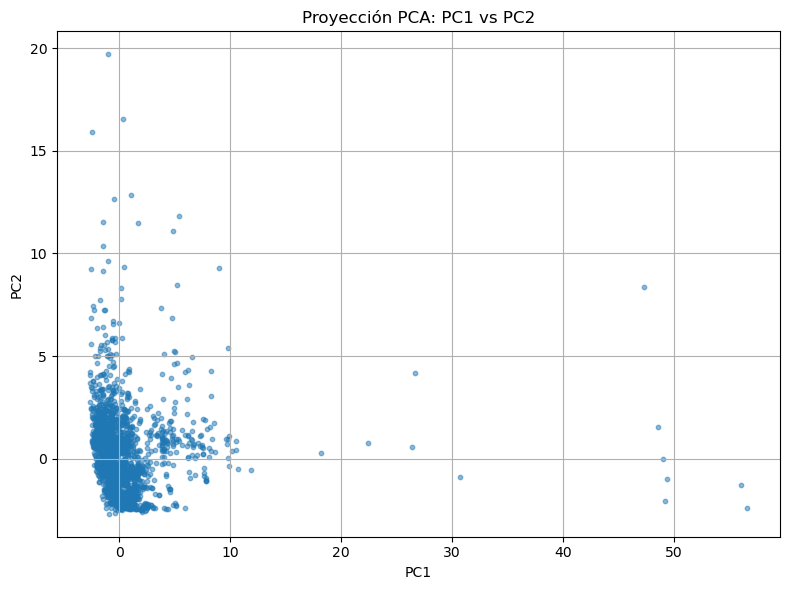

In [18]:
X_pca = pca.transform(X_scaled)

# Graficar en 2D los dos primeros componentes
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=10, alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Proyección PCA: PC1 vs PC2")
plt.grid(True)
plt.tight_layout()
plt.show()

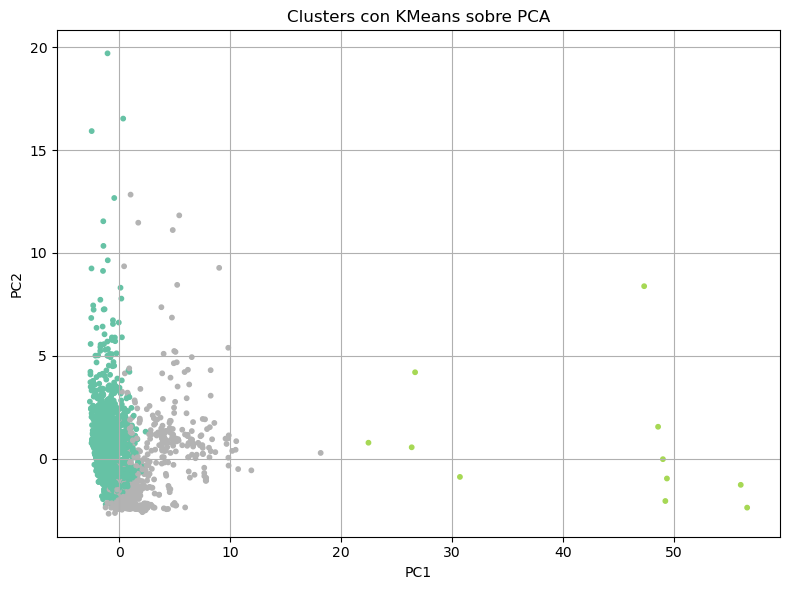

In [19]:
from sklearn.cluster import KMeans

# Usamos las 10 primeras componentes
X_pca_10 = X_pca[:, :10]

# Aplicar KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca_10)

# Visualizar resultado (PC1 vs PC2 coloreado por cluster)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='Set2', s=10)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters con KMeans sobre PCA")
plt.grid(True)
plt.tight_layout()
plt.show()